In [1]:
import numpy as np
import pandas as pd

In [2]:
# df = pd.read_csv('../dataset/kc_house_data.csv', index_col='id')
df = pd.read_csv('../dataset/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Problem statement

> Find out if there is any correlation between `sqft_living` and `price` for the kc housing dataset. Build a linear regression model based on the finding.

## Column definition

1. `price` - Price of each home sold
2. `sqft_living` - Square footage of the apartments interior living space

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

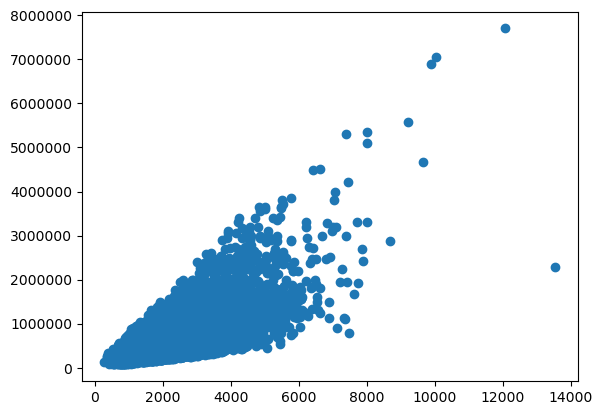

In [5]:
plt.scatter(df.sqft_living, df.price)

# Get the current axis
ax = plt.gca()

# Use ScalarFormatter to format the y-axis
ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.show()

In [6]:
import torch
from torch import nn

In [7]:
torch.__version__

'2.1.0'

In [8]:
X, y = df.sqft_living, df.price

In [9]:
X.head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64

In [10]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [11]:
type(X)

pandas.core.series.Series

In [12]:
X = torch.from_numpy(X.to_numpy()).float()
y = torch.from_numpy(y.to_numpy()).float()

In [13]:
type(X)

torch.Tensor

In [14]:
X

tensor([1180., 2570.,  770.,  ..., 1020., 1600., 1020.])

In [15]:
X = X.unsqueeze(dim=1)
y = y.unsqueeze(dim=1)

X[:10], y[:10]

(tensor([[1180.],
         [2570.],
         [ 770.],
         [1960.],
         [1680.],
         [5420.],
         [1715.],
         [1060.],
         [1780.],
         [1890.]]),
 tensor([[ 221900.],
         [ 538000.],
         [ 180000.],
         [ 604000.],
         [ 510000.],
         [1225000.],
         [ 257500.],
         [ 291850.],
         [ 229500.],
         [ 323000.]]))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [18]:
X_train

tensor([[1780.],
        [1000.],
        [1080.],
        ...,
        [2120.],
        [ 380.],
        [3130.]])

In [19]:
X_test

tensor([[2070.],
        [2900.],
        [3770.],
        ...,
        [2434.],
        [2250.],
        [2570.]])

In [20]:
y_train

tensor([[325000.],
        [257000.],
        [228500.],
        ...,
        [575000.],
        [245000.],
        [315000.]])

In [21]:
y_test

tensor([[ 365000.],
        [ 865000.],
        [1038000.],
        ...,
        [ 285000.],
        [ 605000.],
        [ 356500.]])

In [22]:
X.size(), y.size()

(torch.Size([21613, 1]), torch.Size([21613, 1]))

In [23]:
X_train.size(), X_test.size(), y_train.size(), y_test.size()

(torch.Size([17290, 1]),
 torch.Size([4323, 1]),
 torch.Size([17290, 1]),
 torch.Size([4323, 1]))

In [24]:
# Model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(
            in_features=1,
            out_features=1
        )


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(42)

model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [25]:
# Check model device
next(model.parameters()).device

device(type='cpu')

In [26]:
next(model.parameters())

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [27]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01
)

In [28]:
if torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [29]:
device

device(type='mps')

In [30]:
# Training the model
torch.manual_seed(42)

# Epoch count
epochs = 1000

# Move data and model to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

model.to(device)

for epoch in range(epochs):
    model.train()

    # 1.Forward pass
    y_pred = model(X_train)

    # 2.Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3.Zero grad optimizer
    optimizer.zero_grad()

    # 4.Loss backward
    loss.backward()

    # 5.Step up the optimizer
    optimizer.step()


    # Testing
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test)


    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}')

/Users/shreyashkumar/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/autograd/__init__.py:251: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0 | Train loss: 536181.6875 | Test loss: 504125.0625
Epoch: 100 | Train loss: 166650.71875 | Test loss: 171871.953125
Epoch: 200 | Train loss: 166650.703125 | Test loss: 171871.9375
Epoch: 300 | Train loss: 166650.703125 | Test loss: 171871.953125
Epoch: 400 | Train loss: 166650.703125 | Test loss: 171871.953125
Epoch: 500 | Train loss: 166650.703125 | Test loss: 171871.9375
Epoch: 600 | Train loss: 166650.703125 | Test loss: 171871.953125
Epoch: 700 | Train loss: 166650.703125 | Test loss: 171871.953125
Epoch: 800 | Train loss: 166650.703125 | Test loss: 171871.953125
Epoch: 900 | Train loss: 166650.703125 | Test loss: 171871.953125


In [36]:
def plot_predictions(train_data=X_train.cpu(), 
                     train_labels=y_train.cpu(), 
                     test_data=X_test.cpu(), 
                     test_labels=y_test.cpu(), 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

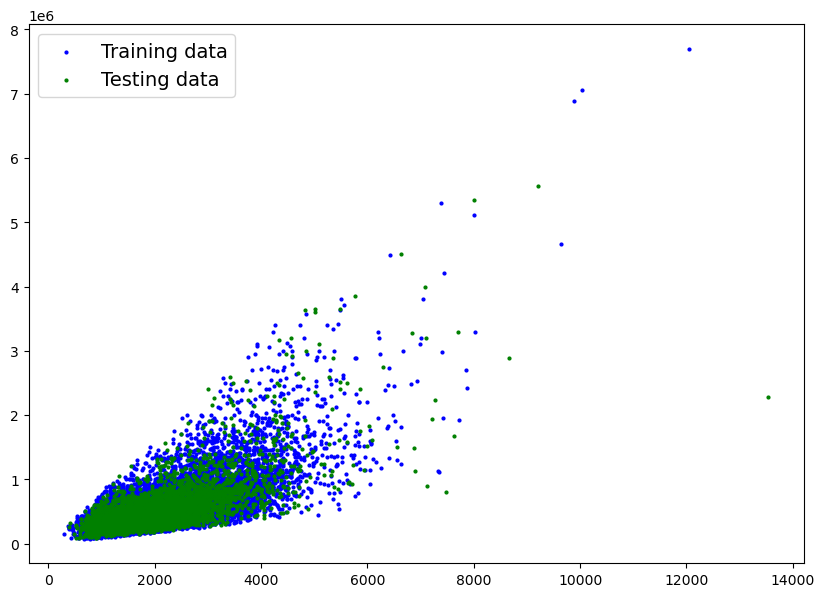

In [37]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu())

In [38]:
# Making predictions
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([[498044.4375],
        [697742.8750],
        [907065.3750],
        ...,
        [585623.0000],
        [541352.5000],
        [618344.6875]], device='mps:0')

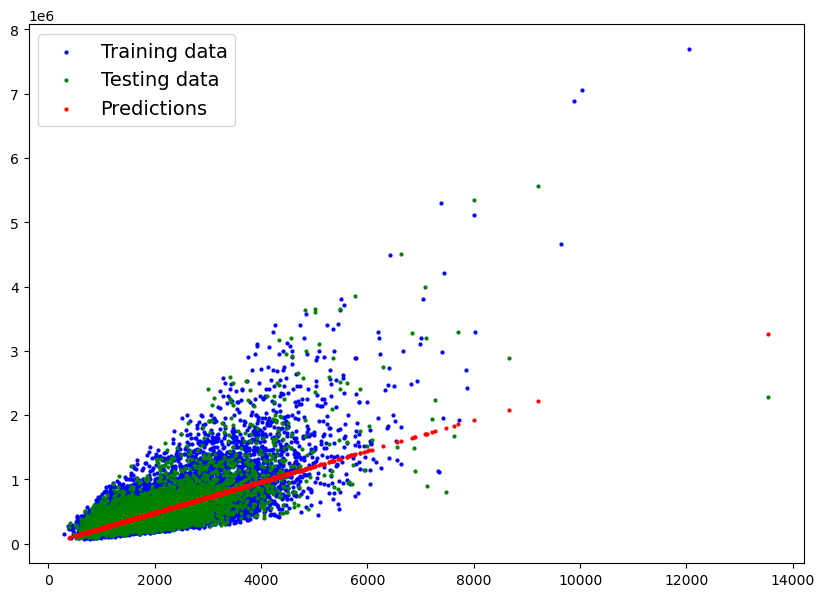

In [39]:
plot_predictions(predictions=y_preds.cpu())